In [1]:
!pip install git+https://github.com/fastai/fastai.git
!pip install kaggle

  Cloning https://github.com/fastai/fastai.git to /tmp/pip-req-build-a6_0ik4f
    100% |████████████████████████████████| 1.5MB 13.3MB/s 
    100% |████████████████████████████████| 112kB 27.0MB/s 
    100% |████████████████████████████████| 184kB 21.5MB/s 
    100% |████████████████████████████████| 3.6MB 8.0MB/s 
    100% |████████████████████████████████| 496.4MB 28kB/s 
    100% |████████████████████████████████| 51kB 19.3MB/s 
    100% |████████████████████████████████| 61kB 21.0MB/s 
    100% |████████████████████████████████| 2.2MB 6.0MB/s 
    100% |████████████████████████████████| 11.6MB 2.2MB/s 
    100% |████████████████████████████████| 92kB 26.3MB/s 
    100% |████████████████████████████████| 112kB 31.2MB/s 
    100% |████████████████████████████████| 71kB 25.2MB/s 
    100% |████████████████████████████████| 901kB 3.3MB/s 
    100% |████████████████████████████████| 81kB 26.5MB/s 
    100% |████████████████████████████████| 15.8MB 2.1MB/s 
    100% |████████████████████

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"iamkartik","key":"6e3479891f4f6ad440a7ab44a5a131d9"}'}

In [6]:
!mkdir ~/.kaggle
!cp /content/kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

!kaggle competitions download -c invasive-species-monitoring

mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/214k [00:00<?, ?B/s]
100% 214k/214k [00:00<00:00, 52.5MB/s]
  0% 0.00/318k [00:00<?, ?B/s]
100% 318k/318k [00:00<00:00, 73.1MB/s]
 97% 337M/346M [00:06<00:00, 70.9MB/s]
100% 346M/346M [00:06<00:00, 52.8MB/s]
 98% 337M/345M [00:06<00:00, 66.2MB/s]
100% 345M/345M [00:06<00:00, 57.4MB/s]


In [11]:
!kaggle competitions download -c invasive-species-monitoring

100% 1.14G/1.14G [00:17<00:00, 50.3MB/s]
100% 1.14G/1.14G [00:18<00:00, 68.2MB/s]
100% 1.98G/1.98G [01:03<00:00, 36.5MB/s]

  0% 0.00/6.19k [00:00<?, ?B/s]
100% 6.19k/6.19k [00:00<00:00, 5.92MB/s]
  0% 0.00/4.18k [00:00<?, ?B/s]
100% 4.18k/4.18k [00:00<00:00, 4.11MB/s]


In [19]:
!ls

kaggle .json  sample_data		 test	  train.7z
kaggle.json   sample_submission.csv	 test.7z  train_labels.csv
__MACOSX      sample_submission.csv.zip  train	  train_labels.csv.zip


In [16]:
!7z x train.7z
!7z x test.7z



7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 2126278821 bytes (2028 MiB)

Extracting archive: train.7z
--
Path = train.7z
Type = 7z
Physical Size = 2126278821
Headers Size = 24792
Method = LZMA2:24
Solid = +
Blocks = 2

  0%      0% 1        0% 4 - train/1000.jpg                         0% 8 - train/1004.jpg                         0% 13 - train/1009.jpg                          0% 14 - train/101.jpg                         0% 17 - train/1012.jpg                          1% 21 - train/1016.jpg

In [17]:
!unzip train_labels.csv.zip
!unzip sample_submission.csv.zip 

Archive:  train_labels.csv.zip
  inflating: train_labels.csv        
   creating: __MACOSX/
  inflating: __MACOSX/._train_labels.csv  
Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   
  inflating: __MACOSX/._sample_submission.csv  


In [0]:
%matplotlib inline

In [0]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.dataset import *
from fastai.learner import *
from fastai.model import *
from fastai.sgdr import *

In [0]:
import matplotlib.pyplot as plt

In [4]:
train_data = os.listdir('train')
train_data[0]

'456.jpg'

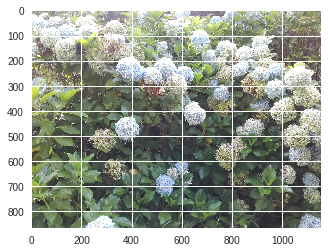

In [5]:
PATH = '/content/'

image = plt.imread(f'{PATH}train/{train_data[10]}')
plt.imshow(image)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. Please call randint(0, 2295 + 1) instead
  


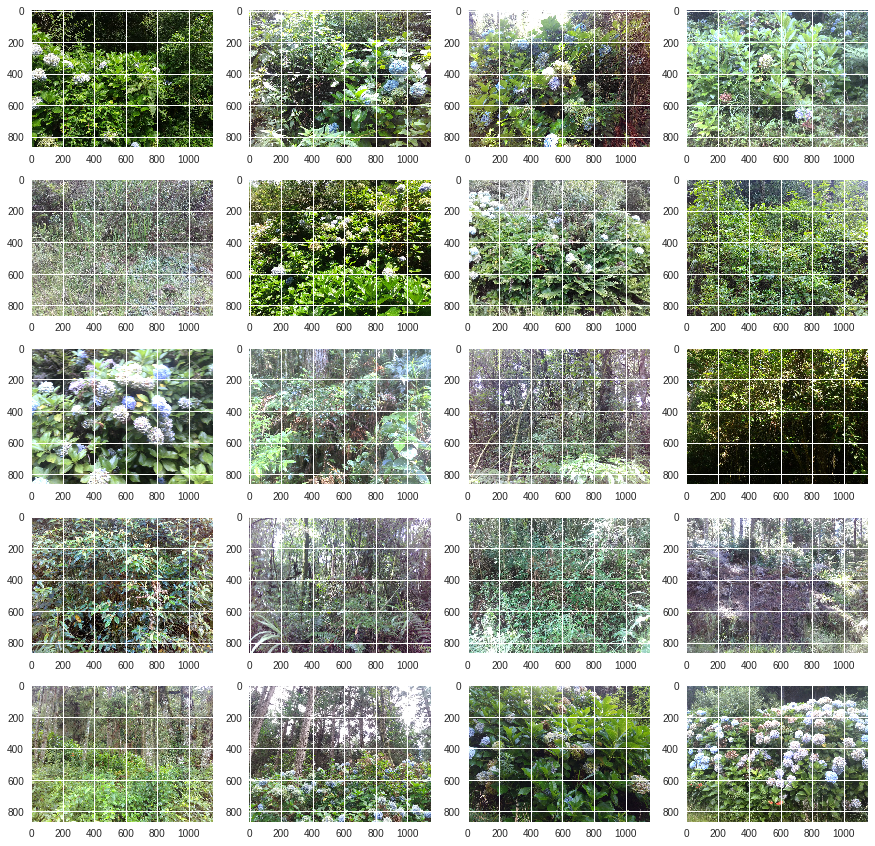

In [30]:
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 5

for i in range(1, columns*rows +1):
  counter = np.random.random_integers(0,len(train_data))
  img=plt.imread(f'{PATH}train/{train_data[counter]}')
  fig.add_subplot(rows, columns, i)
  plt.imshow(img)
plt.show()

In [0]:
arch = resnet34

sz=224

In [7]:
labels = pd.read_csv('train_labels.csv')
labels.head()

,name,invasive
0,1,0
1,2,0
2,3,1
3,4,0
4,5,1


In [8]:
val_idx = get_cv_idxs(len(train_data))



data=ImageClassifierData.from_csv(PATH,folder='train',csv_fname='train_labels.csv',
                             test_name='test',suffix='.jpg',val_idxs=val_idx,
                            tfms=tfms_from_model(arch,sz),bs=48)

learner = ConvLearner.pretrained(arch,data,precompute=True)

learner.fit(0.01,5)

epoch      trn_loss   val_loss   accuracy   
    0      0.340353   0.198029   0.91939   
    1      0.271328   0.162933   0.943355  
    2      0.228273   0.15644    0.954248  
    3      0.196369   0.154047   0.938998  
    4      0.189501   0.153329   0.936819  



[array([0.15333]), 0.9368191721132898]

In [39]:
learner.lr_find()

 93%|█████████▎| 27/29 [00:00<00:00, 27.46it/s, loss=0.281]


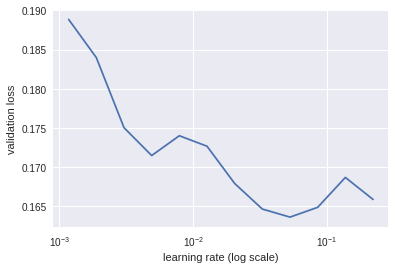

In [45]:
learner.sched.plot()

In [9]:
learner.precompute=False
learner.fit(0.01,4)

epoch      trn_loss   val_loss   accuracy   
    0      0.167961   0.158366   0.949891  
    1      0.174783   0.1352     0.945534  
    2      0.164264   0.160001   0.958606  
    3      0.173431   0.149113   0.949891  



[array([0.14911]), 0.9498910675381264]

In [0]:
learner.unfreeze()

lrs = [1e-4,1e-3,1e-2]

learner.fit(lrs,n_cycle=2)

  0%|          | 0/39 [00:00<?, ?it/s]

In [1]:
!ls

kaggle .json  models			 test	  train.7z
kaggle.json   sample_data		 test.7z  train_labels.csv
lr_plot.png   sample_submission.csv	 tmp	  train_labels.csv.zip
__MACOSX      sample_submission.csv.zip  train


In [11]:
preds = learner.TTA(is_test=True)

In [12]:
preds[:10]

(array([[[ -0.00071,  -7.25158],
         [ -0.00515,  -5.27114],
         [ -7.57573,  -0.00051],
         ...,
         [ -0.11286,  -2.23751],
         [ -6.71748,  -0.00121],
         [ -0.00553,  -5.20008]],
 
        [[ -0.00531,  -5.24004],
         [ -0.00359,  -5.63012],
         [ -8.31519,  -0.00024],
         ...,
         [ -0.20624,  -1.68008],
         [ -4.44101,  -0.01185],
         [ -0.02908,  -3.55212]],
 
        [[ -0.00333,  -5.70581],
         [ -0.00389,  -5.55244],
         [ -8.67854,  -0.00017],
         ...,
         [ -0.10917,  -2.26892],
         [ -6.92098,  -0.00099],
         [ -0.40754,  -1.09448]],
 
        [[ -0.00394,  -5.53761],
         [ -0.04876,  -3.04517],
         [-10.10591,  -0.00004],
         ...,
         [ -0.11401,  -2.22791],
         [ -5.79636,  -0.00304],
         [ -0.02182,  -3.83602]],
 
        [[ -0.00397,  -5.53025],
         [ -0.0037 ,  -5.60151],
         [ -8.51455,  -0.0002 ],
         ...,
         [ -0.11286,  -2.23

In [13]:
sample = pd.read_csv('sample_submission.csv')
sample.head()

,name,invasive
0,1,0.5
1,2,0.5
2,3,0.5
3,4,0.5
4,5,0.5


In [17]:
probs = np.exp(preds)

AttributeError: ignored

In [0]:
preds = learner.predict(is_test=True)

In [19]:
preds[:10]

array([[ -0.00071,  -7.25158],
       [ -0.00515,  -5.27114],
       [ -7.57573,  -0.00051],
       [ -0.00704,  -4.95944],
       [ -0.04322,  -3.16298],
       [ -0.00068,  -7.2976 ],
       [ -0.00179,  -6.32406],
       [ -0.02035,  -3.90493],
       [-11.2603 ,  -0.00001],
       [ -0.00054,  -7.53265]], dtype=float32)

In [20]:
preds = np.exp(preds)
preds[:10]

array([[0.99929, 0.00071],
       [0.99486, 0.00514],
       [0.00051, 0.99949],
       [0.99298, 0.00702],
       [0.9577 , 0.0423 ],
       [0.99932, 0.00068],
       [0.99821, 0.00179],
       [0.97986, 0.02014],
       [0.00001, 0.99999],
       [0.99946, 0.00054]], dtype=float32)

In [21]:
data.classes

['0', '1']

In [22]:
invasive = preds[:,1]
invasive[:10]

array([0.00071, 0.00514, 0.99949, 0.00702, 0.0423 , 0.00068, 0.00179, 0.02014, 0.99999, 0.00054],
      dtype=float32)

In [24]:
test_data = os.listdir('test')
subm = pd.DataFrame(columns=['name','invasive'])
subm.head()

,name,invasive


In [28]:
subm.name=list(map(lambda x:x[:-4],test_data))
subm.invasive = invasive
subm.head()

,name,invasive
0,456,0.000709
1,521,0.005138
2,1253,0.999487
3,597,0.007017
4,391,0.042300


In [0]:
subm.to_csv('submission_1.csv',index=False)

In [30]:
!kaggle competitions submit -c invasive-species-monitoring -f submission_1.csv -m "First submission test"

Successfully submitted to Invasive Species Monitoring